<a href="https://colab.research.google.com/github/stixmal/praktikum_project_ds/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%BE%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5%20%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80/purchase_of_apartments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

Научимся определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры, которые позволят построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность. В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Источник: `/datasets/real_estate_data.csv`.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление

### [1. Ознакомление с общей информацией](#1) <a id='10'></a>   

### [2. Предобработка данных](#2) <a id='20'></a>
+ [Работа с пропусками](#2.1)  


+ [Замена типа данных](#2.2)

### [3. Работа с таблицей](#3) <a id='30'></a>
+ [Определение цены квадратного метра](#3.1)  


+ [Расчёт даты публикации объявления](#3.2)  


+ [Категоризация данных столбца с этажом квартиры](#3.3)  


+ [Расчёт соотношения площадей в квартире](#3.4)  


### [4. Исследовательский анализ данных](#4) <a id='40'></a>
+ [Исследование площади, цены, числа комнат, высоты потолков](#4.1)


+ [Исследование количества времени для продажи квартиры](#4.2)


+ [Анализ редких и выбивающихся значений](#4.3)


+ [Исследование факторов, влияющих на стоимость квартиры](#4.4)


+ [Анализ десяти населённых пунктов с наибольшим числом объявлений](#4.5)


+ [Анализ изменения цены по степени удалённости от центра](#4.6)


+ [Сравнение выводов по квартирам в центре и общих выводов по всему городу](#4.7)


### [5. Общий вывод](#5) <a id='50'></a>
***

## 1. Ознакомление с общей информацией <a id='1'></a>   [^](#10) 

Изучим данные, предоставленные сервисом Яндекс.Недвижимость для проекта.

In [ ]:
# импорт библиотеки pandas
import pandas as pd    

# импорт библиотеки mathplot
import matplotlib.pyplot as plt

# импорт модуля display
from IPython.display import display  

Прочитаем файл и сохраним его в переменной `df`.

In [ ]:
# чтение файла с данными
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  

Оценим взглядом нашу таблицу.

In [ ]:
# вызов таблицы на экран
display(df)     

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Общая информация о данных таблицы *'df'*.

In [ ]:
# получение общей информации о данных в таблице df
df.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Рассмотрим полученную таблицу.

Всего в таблице 22 столбца с целочисленными, вещественными, строковыми и булевыми данными.

Разберём какую информацию содержат столбцы.

* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах(м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении


Количество значений  в столбцах различается. Множество столбцов имеют пропущенные значения.

###  Выводы
Наша таблица имеет множество пропусков в столбцах с различными типами данных. Попробуем разобраться, где можно внести коррективы для дальнейшего анализа и поиска решений вышепоставленных задач.


***

## 2. Предобработка данных <a id='2'></a>   [^](#10)

* ### Работа с пропусками <a id='2.1'></a> [^](#10)

Оценили состояние данных в столбцах. 

In [ ]:
# вызов числового описания данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При первичной оценке увидели некоторые "странности" в нескольких столбцах. В столбце со стоимостью жилья имеется минимальная цена в 12000 рублей, или в столбце с величиной потолков максимальный размер потолка достигает 100 метров. Данные не очень кореллируют с реальностью, поэтому требуют дальнейшей проверки.

### *'balcony'*

Для некоторых пропущенных значений можно предположить логичную замену. Если человек не указал число балконов - скорее всего их нет. 

In [ ]:
# замена на целочисленный тип данных
df['balcony'] = df['balcony'].astype('Int64')

# замена пропущенных значений в столбце 'balcony'
df['balcony'] = df['balcony'].fillna(value=0)
df['balcony']

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: Int64

***

### *'floors_total'*


   В столбце с общим числом этажей немного пропусков. Однако сложно подобрать рациональное объяснение об их заполнении. Изменили только тип данных: фактически число этажей, как и число балконов являются только целочисленными величинами.

In [ ]:
# замена на целочисленный тип данных
df['floors_total'] = df['floors_total'].astype('Int64')


***

### *'is_apartment'*

   Столбец, указывающий на вид недвижимости, имеет также много пропусков. Так как на данный момент апартаменты не являются равнозначным объектом жилой недвижимости наряду с квартирами, неуказание или умалчивание этого факта сильно влияет на момент принятия решения о покупке. Оставим тот столбец как есть.

***

* ### Замена типа данных <a id='2.2'></a> [^](#10)

### *'first_day_exposition'*
Столбец с указанием времени размещения объекта перевели в формат даты без указания точного времени.

In [ ]:
# перевод типа данных в формат времени
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

***

### *'locality_name'*
Пропусков в столбце с местом продажи объекта недвижимости не очень много (менее 0,5 %). Заполнить их возможно, создав категорию с неизвестными населенными пунктами.Также изменили регистр строковых данных.

In [ ]:
# создание неизвестной группы
df['locality_name'] = df['locality_name'].fillna(value = 'Не указано') 

# перевод в нижний регистр
df['locality_name'] = df['locality_name'].str.lower()

# проверка уникальных значений столбца
df['locality_name'].value_counts().head(15)

санкт-петербург            15721
посёлок мурино               522
посёлок шушары               440
всеволожск                   398
пушкин                       369
колпино                      338
посёлок парголово            327
гатчина                      307
деревня кудрово              299
выборг                       237
петергоф                     201
сестрорецк                   183
красное село                 178
кудрово                      173
деревня новое девяткино      144
Name: locality_name, dtype: int64

Провели лемматизацию столбца и выявили 10 населённых пунктов с наибольшим числом объявлений, необходимых по заданию.

In [ ]:
# импорт  Лемматизатора
from pymystem3 import Mystem        
m = Mystem() 

# используется коллекция для подсчета неизменяемых объектов
from collections import Counter
  
# функция для лемматизации столбца с именами    
def to_lemmas(text):                                         
    result =' '.join(m.lemmatize(text))   
    return result                         
                   
# применение функции к столбцу с именами и вывод результата в переменную
lemas_list = df['locality_name'].apply(to_lemmas).tolist()

In [ ]:
# подсчёт уникальных значений столбца
print(Counter(' '.join(lemas_list).split()))

Counter({'санкт-петербург': 15721, 'поселок': 2660, 'деревня': 945, 'муриный': 590, 'городской': 550, 'кудрово': 472, 'шушары': 440, 'всеволожск': 398, 'пушкин': 369, 'тип': 363, 'колпино': 338, 'парголовый': 327, 'гатчина': 307, 'выборг': 237, 'село': 210, 'петергоф': 201, 'красный': 190, 'новый': 187, 'сестрорецк': 183, 'девяткино': 144, 'сертолово': 142, 'ломоносов': 133, 'кириши': 125, 'бугор': 114, 'сланцы': 112, 'волхов': 111, 'сосновый': 105, 'кингисепп': 104, 'тосно': 104, 'бор': 101, 'кронштадт': 96, 'никольское': 94, '-': 91, 'коммунар': 90, 'кировск': 84, 'отрадный': 80, 'старый': 75, 'янино': 68, '1': 68, 'металлострой': 66, 'приозерск': 66, 'луг': 61, 'шлиссельбург': 57, 'имя': 53, 'тихвин': 49, 'не': 49, 'указывать': 49, 'стрельна': 44, 'тельман': 41, 'большой': 40, 'рощино': 39, 'павловск': 38, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'мга': 33, 'сиверский': 29, 'ивангород': 28, 'новоселье': 28, 'малый': 28, 'сясьстрой': 24, 'зеленогорск': 24

Создали столбец с 10 самых упоминаемых населённых пунктов.

In [ ]:
# функция создания столбца с категорией населённого пункта
def to_cat_name(row):                                         

    if  'санкт-петербург' in row.split(' '):
        return 'санкт-петербург'
    if 'мурино' in row.split(' '):
        return 'мурино'
    if 'кудрово' in row.split(' '):
        return 'кудрово'
    if 'шушары' in row.split(' '):
        return 'шушары'
    if  'всеволожск' in row.split(' '):
        return 'всеволожск'
    if 'пушкин' in row.split(' '):
        return 'пушкин'
    if 'колпино' in row.split(' '):
        return 'колпино'
    if 'парголово' in row.split(' '):
        return 'парголово'
    if 'гатчина' in row.split(' '):
        return 'гатчина'
    if 'выборг' in row.split(' '):
        return 'выборг'
    else:
        return 'другие'

# создание столбца в таблице df    
df['name_group'] = df['locality_name'].apply(to_cat_name)     

In [ ]:
# подсчет значений в новом столбце
df['name_group'].value_counts()

санкт-петербург    15721
другие              4500
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: name_group, dtype: int64

***

### *'ceiling_height'*

   Разброс величин обычно лежит в узких пределах. Однако из-за наличия выбросов пропуски в столбце с указанием высоты потолков сложно заменить медианным значением, так как количество пропусков составляет около 40 %. 


***

### *'living_area'* , *'kitchen_area'*

   Пропусков в столбце с жилой площадью и кухонной примерно 10%. Соотношение жилой и кухонной площади сильно различается от квартиры к квартире, поэтому здесь также сложно найти логическое обоснование замены пропусков медианным или средним значением.


***

### *'days_exposition'* 
Привели к целочисленному типу данных количество дней, в течение которых была продана недвижимость.

In [ ]:
# замена на целочисленный тип данных
df['days_exposition'] = df['days_exposition'].round(0).astype('Int64')
df['days_exposition']

0        NaN
1         81
2        558
3        424
4        121
        ... 
23694    NaN
23695     45
23696    NaN
23697    602
23698    NaN
Name: days_exposition, Length: 23699, dtype: Int64

###  Выводы
При анализе таблицы мы увидели, что полностью заполнены лишь важные столбцы, вписанные пользователем, такие как - цена, общая площадь, количество комнат, этаж. Другие столбцы содержали пропуски, так как второстепенные показатели пользователь может не знать, либо забыть - высота потолков, жилая площадь, площадь кухни.

Данные в столбцах, полученные автоматическим образом на основе картографических данных такие как: расстояние до центра, аэропорта, ближайшего парка и водоёма, мы оставили без изменений, потому что заполнение данных пропусков довольно проблематично.


***

## 3. Работа с таблицей <a id='3'></a>   [^](#10)

* ### Определение цены квадратного метра <a id='3.1'></a> [^](#10)

Определили цену квадратного метра как отношение цены на общую площадь.

In [ ]:
# создание столбца с ценой квадратного метра
df['price_per_metr'] = (df['last_price'] / df['total_area']).round()
df['price_per_metr']

0        120370.0
1         82921.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72491.0
23695     52542.0
23696     44092.0
23697    149511.0
23698     41796.0
Name: price_per_metr, Length: 23699, dtype: float64

* ### Расчёт даты публикации объявления <a id='3.2'></a> [^](#10)

Создали столбец с днём недели.

In [ ]:
# функция для определения дня недели и создание столбца
def to_weekday(row):
    
    data = pd.Series(['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'])
    
    if row in data.index:
        return data.loc[row]
    
df['weekday_exp'] = df['first_day_exposition'].dt.weekday.apply(to_weekday)

# проверка уникальных значений столбца
df['weekday_exp'].value_counts()

четверг        4295
вторник        4183
пятница        4000
среда          3974
понедельник    3612
суббота        1936
воскресенье    1699
Name: weekday_exp, dtype: int64

Создали столбец с месяцем размещения объявления.

In [ ]:
# функция для определения месяца и создание столбца
def to_month(row):
    data = pd.Series(['no', 'январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь',
                                'октябрь', 'ноябрь', 'декабрь'])
    if row in data.index:
        return data.loc[row]
    
df['month_exp'] = df['first_day_exposition'].dt.month.apply(to_month)

# проверка уникальных значений столбца
df['month_exp'].value_counts()

февраль     2640
март        2587
апрель      2379
ноябрь      2371
октябрь     2127
сентябрь    1981
июнь        1760
август      1744
июль        1695
декабрь     1641
январь      1500
май         1274
Name: month_exp, dtype: int64

Создали столбец с годом публикации объявления о продаже.

In [ ]:
# создание столбца с годом
df['year_exp'] = df['first_day_exposition'].dt.year

# проверка уникальных значений столбца
df['year_exp'].value_counts()

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year_exp, dtype: int64

* ### Категоризация данных столбца с этажом квартиры <a id='3.3'></a> [^](#10)

Категоризировали столбец с этажом квартиры.

In [ ]:
# функция для распределения этажей по категориям
def to_floor(row):
    
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floors_group'] = df.apply(to_floor, axis=1)

# проверка уникальных значений столбца
df['floors_group'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floors_group, dtype: int64

* ### Расчёт соотношения площадей в квартире <a id='3.4'></a> [^](#10)

Создали столбец с отношением жилой и кухонной площадей к общей. 

In [ ]:
# создание столбца с отношением жилой площади к общей
df['ratio_living_area'] = (df['living_area'] / df['total_area']).round(3)
df['ratio_living_area']

0        0.472
1        0.460
2        0.612
3          NaN
4        0.320
         ...  
23694    0.548
23695    0.644
23696    0.524
23697      NaN
23698    0.381
Name: ratio_living_area, Length: 23699, dtype: float64

In [ ]:
# создание столбца с отношением кухонной площади к общей 
df['ratio_kithen_area'] = (df['kitchen_area'] / df['total_area']).round(3)
df['ratio_kithen_area']

0        0.231
1        0.272
2        0.148
3          NaN
4        0.410
         ...  
23694    0.103
23695    0.144
23696      NaN
23697    0.304
23698    0.279
Name: ratio_kithen_area, Length: 23699, dtype: float64

###  Выводы
Мы посчитали и добавили в таблицу столбцы с:
* ценой квадратного метра
* днём недели, месяцем и годом
* этажом квартиры
* соотношением жилой и кухонной площади к общей

В дальнейшем попробуем проанализировать эти параметры для более полного ответа на поставленные вопросы.

***

## 4. Исследовательский анализ данных <a id='4'></a>   [^](#10)

* ### Исследование площади, цены, числа комнат, высоты потолков <a id='4.1'></a> [^](#40)

Посмотрели числовое описание данных в столбцах.

In [ ]:
# вызов метода .describe
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14504.000000
mean,60.348651,6.541549e+06,2.070636,2.771499
std,35.654083,1.088701e+07,1.078405,1.261056
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Построили гистограммы для каждого столбца.

### *'total_area'* 

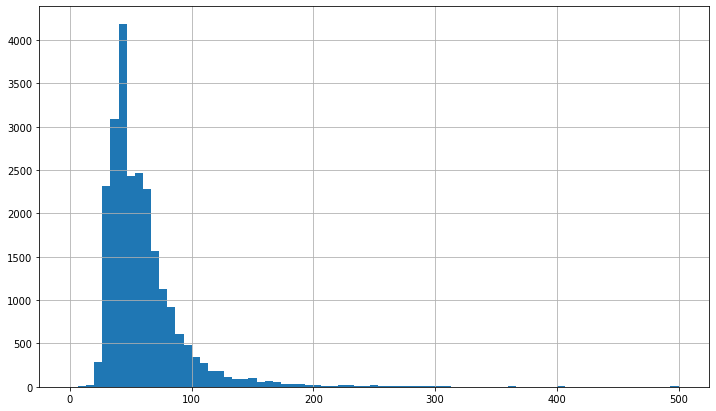

In [ ]:
# гистограмма распределения площади квартиры
df['total_area'].hist(bins=75, range=(0, 500), figsize=(12, 7))
plt.show()

Мы видим, что гистограмма напоминает распределение Пуассона. Среднее арифметическое ненамного больше медианы, что говорит о равномерности выборке. Однако имеется максимум в виде 900 кв.м., при том что в 75 % распределения попадают квартиры в 70 кв.м.

### *'last_price'* 

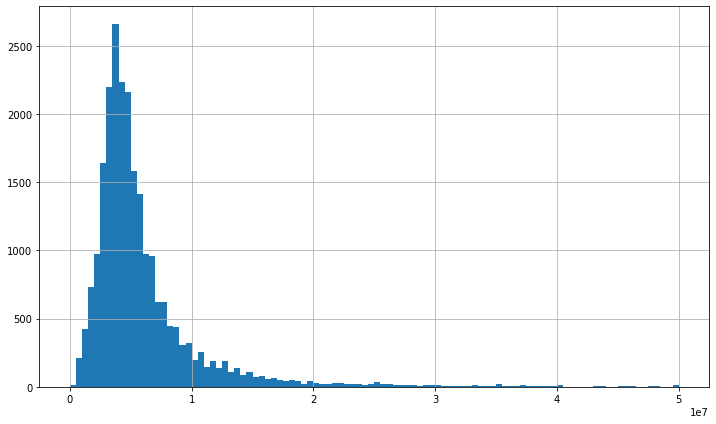

In [ ]:
# гистограмма распределения цены
df['last_price'].hist(bins=100, range=(0, 50*10**6), figsize=(12, 7))
plt.show()

Гистограмма распределения цены также напоминает распределение Пуассона. Из числовых данных видим, что в пределах 3 квартили лежат квартиры, стоимостью до 7 млн.руб. Также имеется выброс в виде очень дорогой недвижимости стоимостью 763 млн.руб. и "нереально" дешёвой стоимостью 12000 руб.

### *'rooms'* 

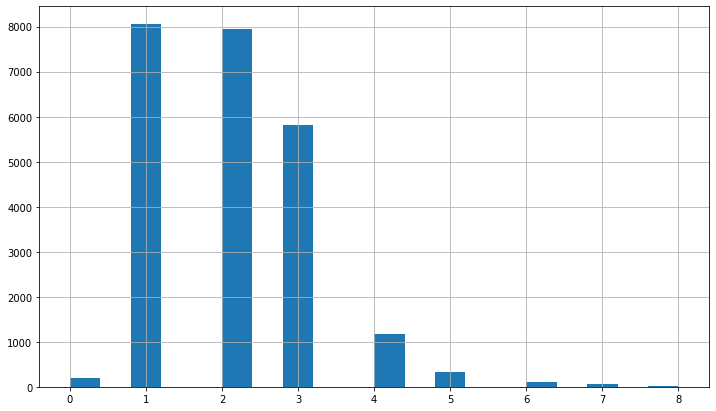

In [ ]:
#гистограмма распределения числа комнат
df['rooms'].hist(bins=20, range=(0, 8), figsize=(12, 7))
plt.show()

Гистограмма практически не отличается от предыдущих по форме распределения. Среднее и медиана практически схожи. Не ясно наличие "нулевых" комнат, а также квартир с очень большим количеством комнат.

### *'ceiling_height'* 

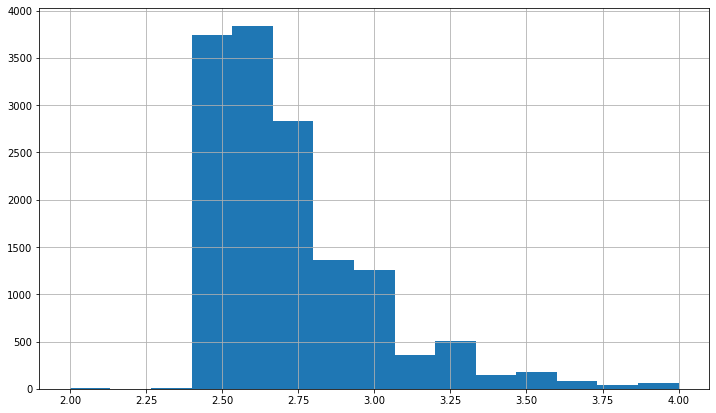

In [ ]:
# гистограмма распределения высоты потолков
df['ceiling_height'].hist(bins=15, range=(2, 4), figsize=(12, 7))
plt.show()

   Числовые данные говорят, что имеется выброс в виде квартир с потолками до 100 м. Данный факт никак не коррелирует с реальностью, так как, руководствуясь здравым смыслом, мы понимаем, что высота потолков лежит в очень узких пределах, и её разброс должен быть минимален.


* ### Исследование количества времени для продажи квартиры <a id='4.2'></a> [^](#40)

Посмотрели на числовые характеристики столбца с временем продажи квартиры.

In [ ]:
# числовое описание данных
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Различие среднего и медианы почти в 2 раза указывает на значительный разброс значений. В 3 квартиль входят продажи, укладывающиеся примерно в 7-8 месяцев. Максимальное время зафиксировано на уровне более 4 лет, что является очень длинным сроком.

Построили гистограмму и диаграмму размаха, чтобы точнее увидеть суть отклонений.

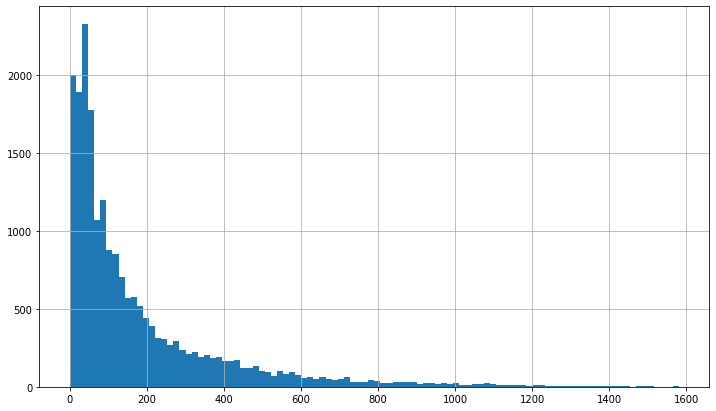

In [ ]:
# построение гистограммы
df['days_exposition'].hist(bins=100, figsize=(12, 7))
plt.show()

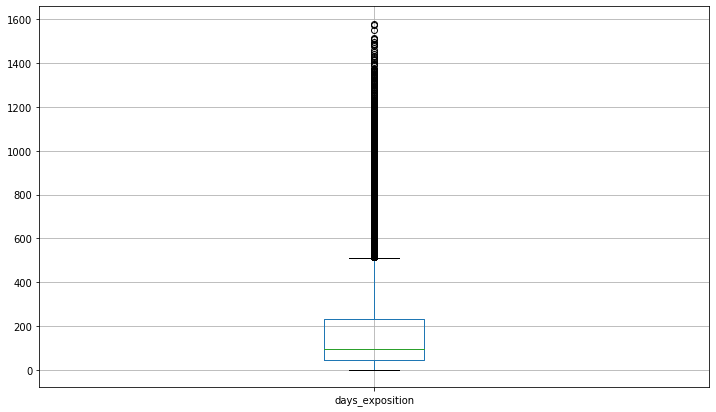

In [ ]:
# построение диаграммы размаха
df.boxplot('days_exposition', figsize=(12, 7))
plt.show()

Из диаграммы мы видим, что медиана тяготеет к "нижнему усу". Значит все выбивающиеся значения за верхним 1,5-межквартильным размахом составляют не очень большую часть. На уровне 600 дней данные значения могут быть убраны. Процент потерь составит 5. 

In [ ]:
# доля потерь после удаления выбросов
len(df.query('days_exposition > 600')) / len(df)

0.05055065614582894

* ### Анализ редких и выбивающихся значений <a id='4.3'></a> [^](#40)

Провели анализ сильно отклоняющихся от большинства значений в разных столбцах.

### *'total_area'* 

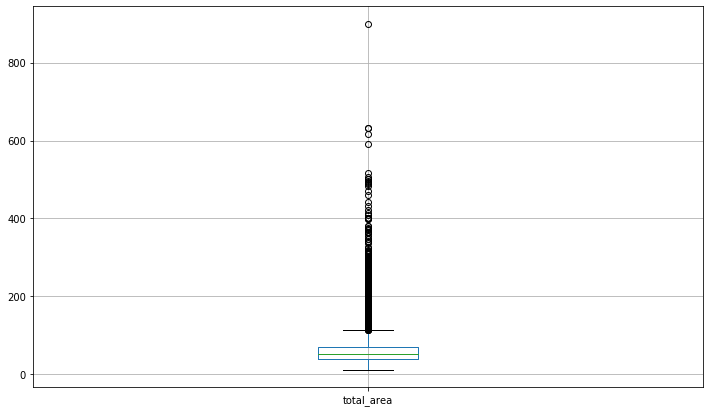

In [ ]:
# построение диаграммы размаха
df.boxplot('total_area', figsize=(12, 7))
plt.show()

In [ ]:
# нахождение группы квартир с большой площадью
df.query('total_area > 130').pivot_table(index='name_group', values='total_area', aggfunc='count')

,total_area
name_group,
всеволожск,1
выборг,4
гатчина,3
другие,28
колпино,1
парголово,1
пушкин,15
санкт-петербург,786


За верхний 1,5-межквартильный размах выходит достаточно много квартир с большой площадью. Практически все они расположены в Петербурге, что вполне естественно. Однако условимся, что уровень в 130 м будет границей выброса. Тогда потеря в точности составила примерно 3,5 %.

In [ ]:
# доля потерь после удаления выбросов
len(df.query('total_area > 130')) / len(df)

0.035402337651377694

### *'last_price'* 

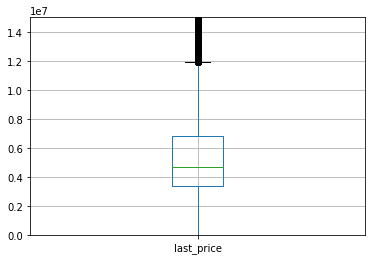

In [ ]:
# построение диаграммы размаха
plt.ylim(0, 15*10**6)
df.boxplot('last_price', figsize=(12, 7))
plt.show()

In [ ]:
# нахождение выброса с необычно дешёвой квартирой в Санкт-Петербурге
df.query('last_price < 0.4*10**6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,name_group,price_per_metr,weekday_exp,month_exp,year_exp,floors_group,ratio_living_area,ratio_kithen_area
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,NaN,...,NaN,8,санкт-петербург,112.0,среда,март,2019,последний,0.294,0.372


In [ ]:
# доля потерь после удаления выбросов
len(df.query('last_price > 15*10**6')) / len(df)

0.050803831385290515

In [ ]:
# нахождение группы очень дорогих квартир
df.query('last_price > 15*10**6').pivot_table(index='name_group', values='last_price', aggfunc='count')

,last_price
name_group,
всеволожск,1
выборг,1
другие,20
колпино,1
пушкин,18
санкт-петербург,1163


Группа очень дорогих квартир преимущественно расположена в Санкт-Петербурге. Можно ли счиатать такой разброс аномалией? Скорее всего эта закономерность имеет объективную природу. Однако для ответов на поставленные вопросы мы условно избавимся от этой части квартир, считая объекты, стоимостью выше 15 миллионнов как выбросы. Тогда потери в точности составят примерно 5 %.

In [ ]:
# доля потерь после удаления выбросов
len(df.query('0.4*10**6 > last_price or last_price > 15*10**6')) / len(df)

0.05084602725853411

### *'rooms'* 

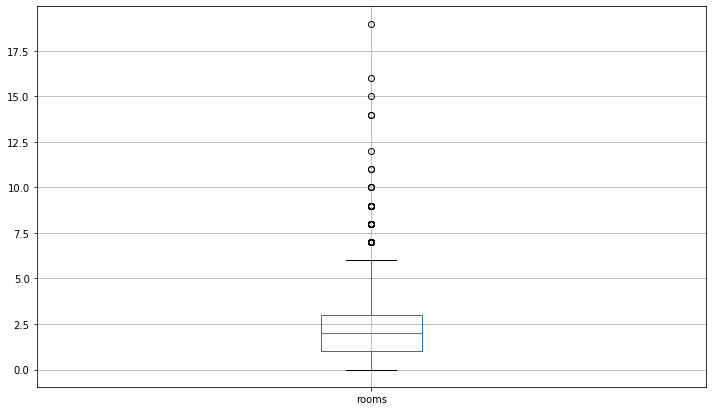

In [ ]:
# построение диаграммы размаха
df.boxplot('rooms', figsize=(12, 7))
plt.show()

In [ ]:
# проверка уникальных значений в столбце с данными по комнатам
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Наличие объектов с нулевым количеством комнат выглядит неправдоподобно, в отличие от петербуржских больших и дорогих квартир с большим количеством комнат. Избавились и от них. Потери в точности примерно 1 %.

In [ ]:
# доля потерь после удаления выбросов
len(df.query('0 == rooms or rooms > 6')) / len(df)

0.012110215620912275

### *'ceiling_height'* 

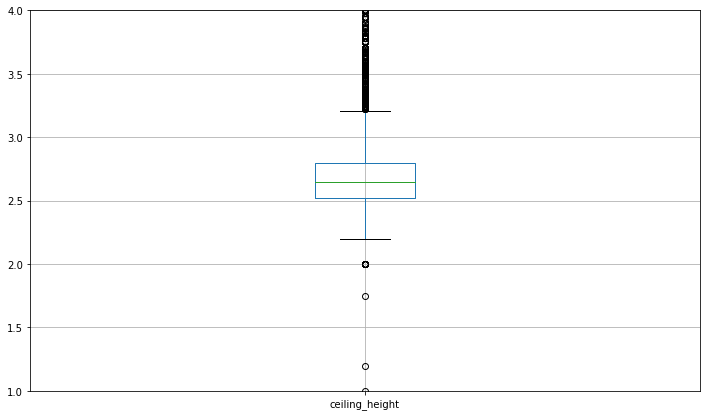

In [ ]:
# диаграмма размаха данных столбца с высотой потолка
df.boxplot('ceiling_height', figsize=(12, 7))
plt.ylim(1, 4)
plt.show()

Потолки высотой ниже 2,4 метров, как и очень высокие потолки признак включения их в аномалии, от которых нужно избавиться. Посмотрели на группу с потолками выше 4 метров.

In [ ]:
# нахождение группы очень дорогих квартир
df.query('ceiling_height > 4').pivot_table(index='name_group', values='ceiling_height', aggfunc='count')

,ceiling_height
name_group,
всеволожск,1
выборг,1
гатчина,1
другие,11
мурино,2
пушкин,1
санкт-петербург,58


Как и ожидалось, большинство квартир находится в Петербурге. Сложно судить о наличии в действительности таких высоких потолков, однако из-за малого их количества можно удалить данные строки. Процент потери в точности примерно 0.5 %.

In [ ]:
# доля потерь после удаления выбросов
len(df.query('2.4 > ceiling_height or ceiling_height > 4')) / len(df)

0.004050803831385291

***

Создали очищенную от аномалий таблицу.

In [ ]:
df_clean = df.query(
                    'days_exposition < 600 and total_area < 130 and 0.4*10**6 < last_price < 15*10**6\
                     and 0 < rooms < 6 and 2.4 < ceiling_height < 4').reset_index(drop=True)
df_clean

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,name_group,price_per_metr,weekday_exp,month_exp,year_exp,floors_group,ratio_living_area,ratio_kithen_area
0,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,48.0,121,санкт-петербург,100000.0,вторник,июнь,2018,другой,0.320,0.410
1,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,NaN,...,NaN,289,санкт-петербург,88525.0,воскресенье,февраль,2017,другой,0.715,0.107
2,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,NaN,...,553.0,137,санкт-петербург,127525.0,четверг,ноябрь,2017,другой,0.513,0.215
3,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,NaN,...,298.0,366,другие,82944.0,суббота,июль,2017,последний,0.631,0.121
4,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,NaN,...,NaN,397,санкт-петербург,81707.0,четверг,ноябрь,2017,первый,0.678,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10522,8,3300000.0,31.0,2017-04-29,1,2.55,9,18.0,6,NaN,...,317.0,193,санкт-петербург,106452.0,суббота,апрель,2017,другой,0.581,0.210
10523,19,9200000.0,101.0,2019-04-01,3,3.05,15,63.0,12,NaN,...,NaN,23,санкт-петербург,91089.0,понедельник,апрель,2019,другой,0.624,0.149
10524,13,3550000.0,35.3,2018-02-28,1,2.86,15,16.3,4,NaN,...,652.0,29,санкт-петербург,100567.0,среда,февраль,2018,другой,0.462,0.258
10525,11,9470000.0,72.9,2016-10-13,2,2.75,25,40.3,7,NaN,...,806.0,519,санкт-петербург,129904.0,четверг,октябрь,2016,другой,0.553,0.145


In [ ]:
# доля потерь после удаления выбросов примерно 56 %
len(df_clean) / len(df)

0.44419595763534325

* ### Исследование факторов, влияющих на стоимость квартиры <a id='4.4'></a> [^](#40)

In [ ]:
# вызов матрицы корреляции из таблицы с неочищенными данными
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653675,0.363343,-0.206747
total_area,0.653675,1.000000,0.758344,-0.231446
rooms,0.363343,0.758344,1.000000,-0.184864
cityCenters_nearest,-0.206747,-0.231446,-0.184864,1.000000


Зависит ли цена от площади, числа комнат, удалённости от центра? Для более наглядного представления вызвали матрицу корреляции с числовым описанием исследуемых данных.

In [ ]:
# вызов матрицы корреляции
df_clean[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.745946,0.468013,-0.349470
total_area,0.745946,1.000000,0.797112,-0.162801
rooms,0.468013,0.797112,1.000000,-0.103176
cityCenters_nearest,-0.349470,-0.162801,-0.103176,1.000000


   После удаления выбросов корреляционные коэффициенты немного выросли. Значит в совокупности зависимости одних величин от других более сильны, а выбросы только "зашумляют" этот вывод, потому и нуждаются в удалении.

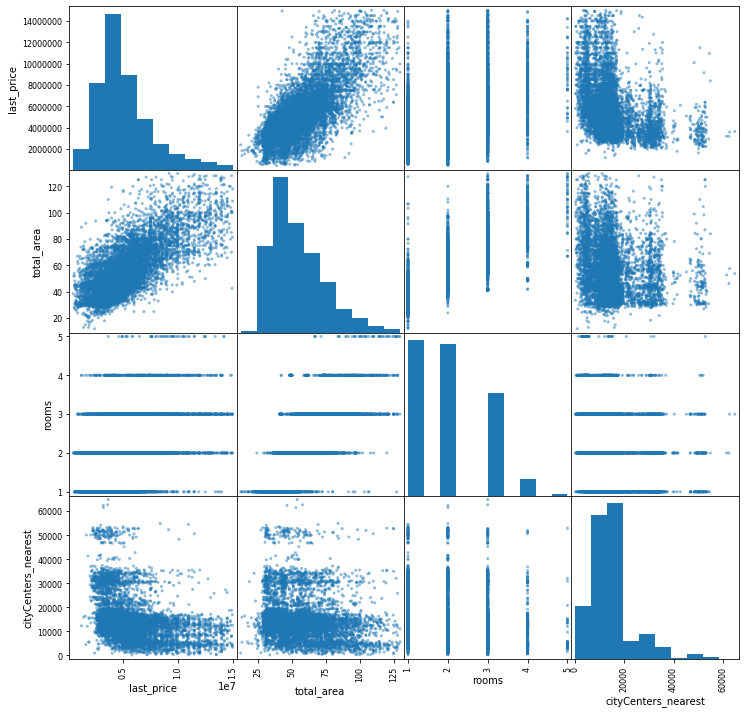

In [ ]:
# диаграммы корреляции между разными параметрами
pd.plotting.scatter_matrix(df_clean[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(12, 12))
plt.show()

Мы видим, что из числовых данных, так и из графиков имеется корреляция между ценой и различными параметрами: при увеличении площади - увеличивается цена квартиры (уровень корреляции 0,74 довольно высок); при увеличении числа комнат также увеличивается цена (корреляция здесь меньше - 0,46, что объясняется неочевидной зависимостью между общей площадью и числом комнат); зависимость цены от расстояния до центра имеет зависимость, похожую на обратную экспоненту (корреляция -0,35), т.е. с удалением от центра уменьшается цена на недвижимость.

***

Изучили зависимость цены квартиры от расположения её на этаже.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


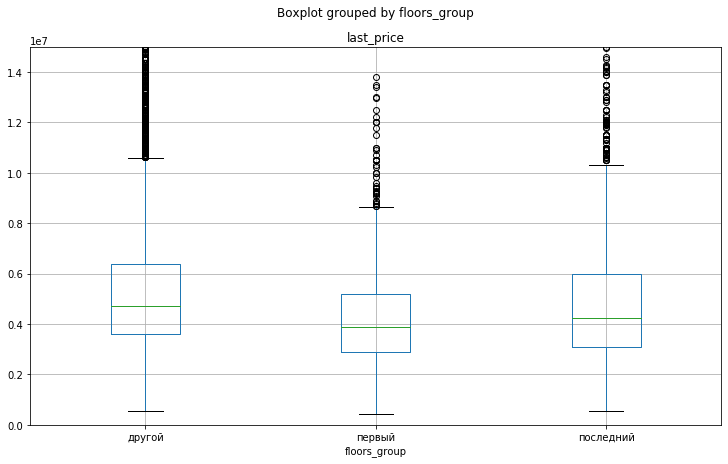

In [ ]:
# диаграмма корреляции по сгруппированным данным
df_clean.boxplot('last_price', by='floors_group', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

Видим, что из всех диаграмм медиана квартир первых этажей более всех тяготеет к нижнему 1,5-межквартильному размаху, а сами "усы" короче, чем в других группах. Медиана группы квартир на последнем этаже находится чуть выше. Квартиры, находящиеся между первым этажом и последним, имеют максимальный уровень межквартильного размаха (верхний "ус" выше остальных), что говорит о более высоком уровне цен на данный тип недвижимости.

***

Изучили зависимость цены от даты размещения.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


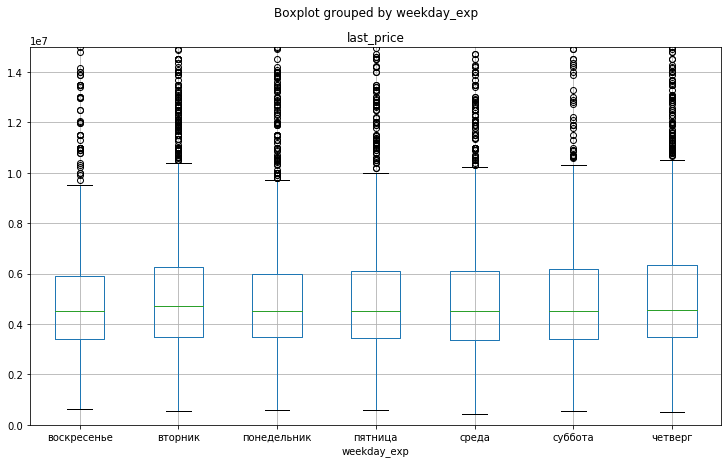

In [ ]:
# диаграммы корреляции по сгруппированным дням недели
df_clean.boxplot('last_price', by='weekday_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

Корреляция как таковая здесь не прослеживается, что говорит об отсутствии связи между днём недели размещения объявления и ценой за объект.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


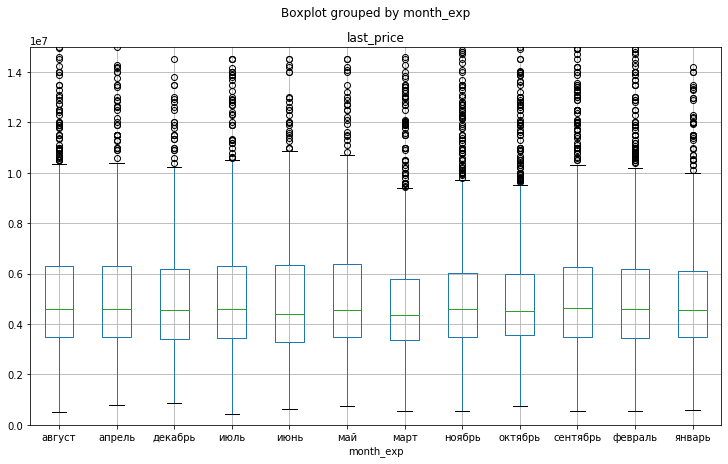

In [ ]:
# диаграммы корреляции по сгруппированным месяцам
df_clean.boxplot('last_price', by='month_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

Месяц выкладывания объявления также не оказывает существенного влияния на уровень цены. Связь, как таковая, отсутствует.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


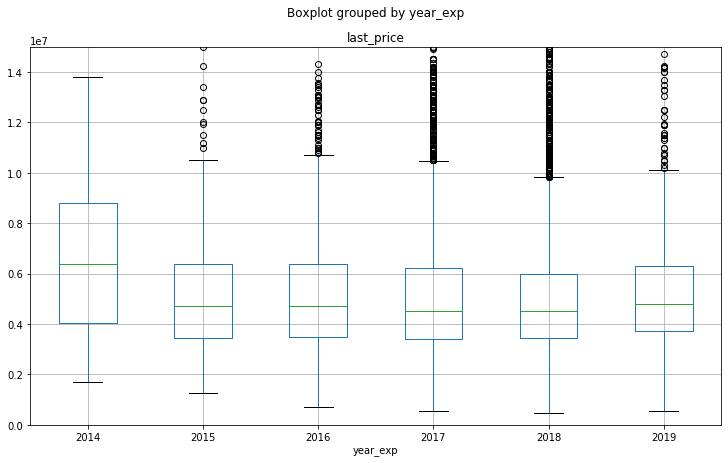

In [ ]:
df_clean.boxplot('last_price', by='year_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

In [ ]:
# нахождение месяца с высокими ценами 2014 года
df_clean.query('year_exp == 2014').pivot_table(index='month_exp', values='last_price', aggfunc='count')

,last_price
month_exp,
декабрь,12
ноябрь,3


Корреляции между разными годами также отсутствует, за исключением 2014 года. Можно предположить, что за теми геополитическими последствиями, имевшие место в начале года, и обвалом рубля в декабре, следует панические продажи недвижимости по более высоким ценам.

* ### Анализ десяти населённых пунктов с наибольшим числом объявлений <a id='4.5'></a> [^](#40)

Выбрали 10 населённых пунктов с наибольшим числом объявлений и посчитали среднюю цену за квадратный метр.

In [ ]:
# подсчёт средней цены за квадратный метр в десяти населённых пунктах
ten_name = df_clean.query('name_group != "другие"').pivot_table(index='name_group', values='price_per_metr').sort_values(
                          by='price_per_metr', ascending=False)
ten_name

,price_per_metr
name_group,
санкт-петербург,106387.223717
пушкин,98895.092593
кудрово,94901.770701
парголово,89548.284483
мурино,87347.909548
шушары,78726.587912
колпино,74933.360465
гатчина,69915.149123
всеволожск,66253.612745


Как и следовало ожидать, максимальная стоимость квартир приходится на Санкт-Петербург, минимальная стоимость квадратного метра находится в городе Выборг, находящийся в 140 км от северной столицы.

* ### Анализ изменения цены по степени удалённости от центра <a id='4.6'></a> [^](#40)

Создали столбец с расстоянием до центра в км.

In [ ]:
# добавление столбца в таблицу
df_clean['km_Centr'] = (df_clean['cityCenters_nearest'] / 1000).round(0) 
df_clean['km_Centr']

0         8.0
1        15.0
2        14.0
3        33.0
4        11.0
         ... 
10522    12.0
10523    14.0
10524    16.0
10525     4.0
10526    34.0
Name: km_Centr, Length: 10527, dtype: float64

In [ ]:
# расчёт средней цены квартир на каждом километре от центра
mean_price_km = df_clean.query('name_group == "санкт-петербург"').pivot_table(index='km_Centr', values='last_price')
mean_price_km.head(10)

,last_price
km_Centr,
0.0,9.472500e+06
1.0,8.728327e+06
2.0,8.624880e+06
3.0,7.749719e+06
4.0,8.332155e+06
5.0,8.149493e+06
6.0,7.268514e+06
7.0,6.647217e+06
8.0,7.157808e+06


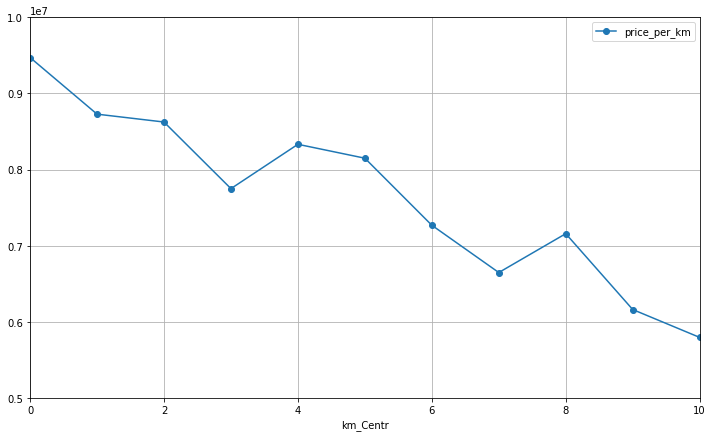

In [ ]:
# построение графика зависимости цены квартиры от расстояния до центра
mean_price_km['last_price'].plot(x=mean_price_km.index, y='last_price',
                                style='o-', xlim=(0, 10), ylim=(5*10**6, 10*10**6), grid=True, figsize=(12, 7),
                                label='price_per_km', legend=True)
plt.show()


Примерно после 2 км от центра мы видим резкое проседание в стоимости недвижимости. Будем считать эту область центральной. 

* ### Сравнение выводов по квартирам в центре и общих выводов по всему городу <a id='4.7'></a> [^](#40)

Выделили сегмент квартир в центре и проанализировали данную территорию.

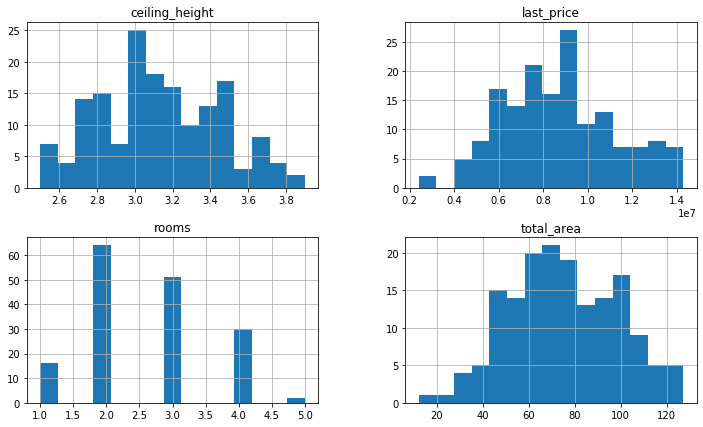

In [ ]:
# создание сегмента квартир в центре
df_Centr = df_clean.query('name_group == "санкт-петербург" and km_Centr <= 2').reset_index(drop=True)

# построение гистограмм
df_Centr[['last_price', 'total_area', 'rooms', 'ceiling_height']].hist(bins=15, figsize=(12, 7))
plt.show()

Данные параметры очень напоминают распределения пуассона, аналогично нами сделанные по всему городу. Посмотрели факторы, которые влияют на стоимость квартир, вызвав матрицу корреляции.

In [ ]:
# матрица корреляции
df_Centr[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.622081,0.338255,-0.049193
total_area,0.622081,1.000000,0.661362,-0.030131
rooms,0.338255,0.661362,1.000000,0.000093
cityCenters_nearest,-0.049193,-0.030131,0.000093,1.000000


Коэффициенты из матрицы показывают, что зависимости цены от общей площади и числа комнат практически идентичны зависимостям, сделанным нами ранее для всего массива данных. В центре города цена на недвижимость слабо коррелирует с расстоянием до центра, что логично.

***

Изучили зависимость цены квартиры от расположения её на этаже в центре города.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


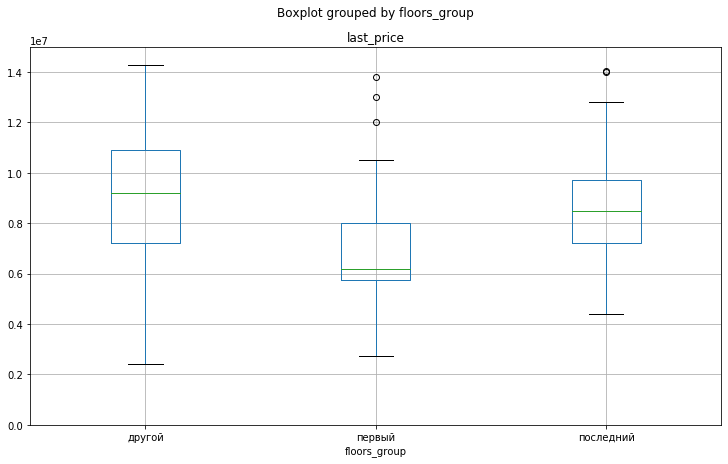

In [ ]:
# диаграмма корреляции по сгруппированным данным
df_Centr.boxplot('last_price', by='floors_group', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

***

Изучили зависимость цены квартиры в центре города от даты размещения.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


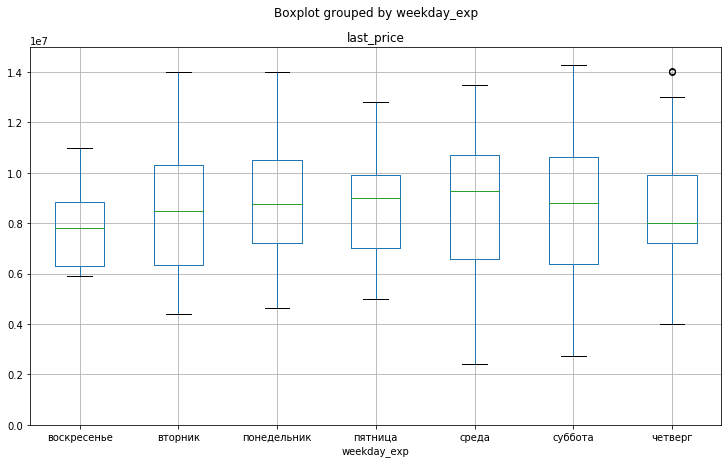

In [ ]:
# диаграммы корреляции по сгруппированным дням недели
df_Centr.boxplot('last_price', by='weekday_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

Имеется небольшое проседание в выходные, что естественно, так как в отдыхе нуждаются все)))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


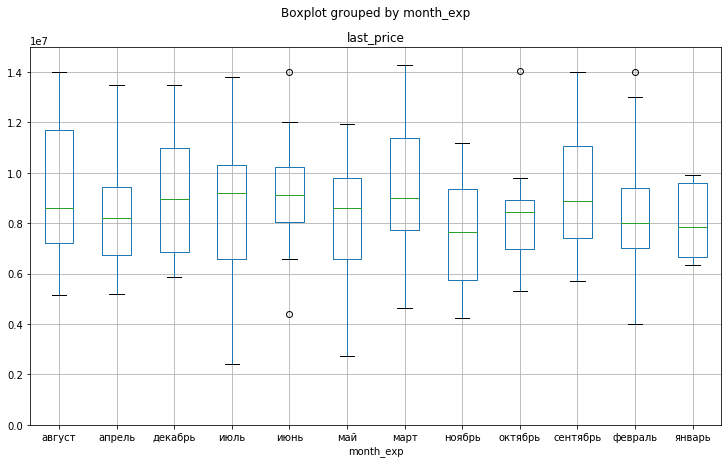

In [ ]:
# диаграммы корреляции по сгруппированным месяцам
df_Centr.boxplot('last_price', by='month_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


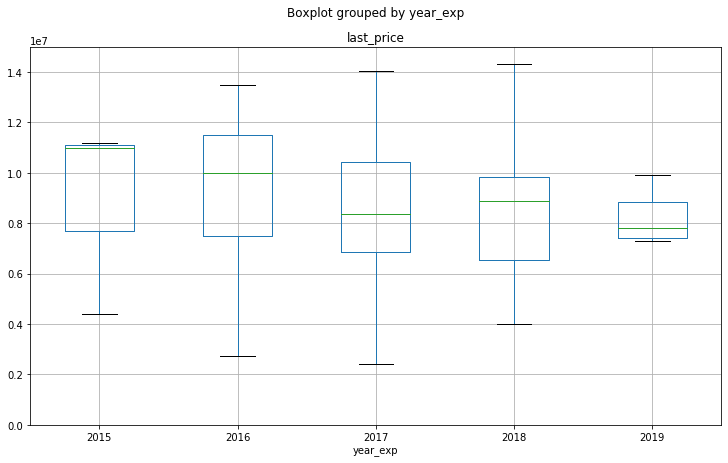

In [ ]:
df_Centr.boxplot('last_price', by='year_exp', figsize=(12, 7))
plt.ylim(0, 15*10**6)
plt.show()

###  Выводы
Проанализировав группу квартир в центре и сравнив выводы по ней с общими по всему городу, мы можем сказать, что ряд зависимостей коррелирует с ценой квартиры аналогичным образом, в каком бы районе она не продавалась. Иными словами, цена на жилье зависит от общей площади, числа комнат и расстояния до центра города, а также не зависит от даты размещения объявления: дня недели, месяца и года.

***

## 5. Общий вывод <a id='5'></a>   [^](#10)

   Мы провели исследование объявлений о продаже квартир, установив ряд взаимосвязей цены объекта от разных параметров.  
       
    
    
- Изначально нами был получен датасет, основанный как на ручном вводе, так и на автоматическом заполнении картографических данных.  
    
- Датасет имел полную информацию в важных категориях (стоимость, общая площадь, количество комнат) и некоторые пропуски в тех типах данных, которые не столь важны при ручном вводе в виду незнания (жилая и кухонная площадь, высота потолков, общее количество этажей в доме).  
    
- Нами были заполнены пропуски, в местах где имелась логическая целесообразность, были изменены некоторые типы данных для лучшего анализа, проведена очистка данных от выбросов и аномальных значений.  
    
- В результате работы мы обнаружили следующие взаимосвязи:  цена на жилье зависит от общей площади, числа комнат и расстояния до центра города. Также имеется слабая корреляция от нахождения квартиры на определённом этаже: меньшим спросом пользуются объекты на первом и последнем этажах. Практически отсутствует взаимосвязь от даты размещения объявления: дня недели, месяца и года.
   